In [1]:
%pylab inline
%load_ext autoreload
%autoreload 2
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import sys
import os
import chainer
project_path = os.getcwd() + '/../../'
sys.path.append(project_path + "utils")

from sklearn.metrics import precision_recall_curve
from sklearn.metrics import auc
from sklearn.metrics import roc_curve
from sklearn.grid_search import GridSearchCV
from sklearn.externals import joblib
import sklearn

Populating the interactive namespace from numpy and matplotlib


In [2]:
import seaborn as sns

/Users/admin/Desktop/anaconda/lib/python2.7/site-packages/matplotlib/__init__.py:872: UserWarning: axes.color_cycle is deprecated and replaced with axes.prop_cycle; please use the latter.
  warnings.warn(self.msg_depr % (key, alt_key))


In [3]:
import function
import preprocessing
import local_bayes
import visualize

In [4]:
import other

In [5]:
sys.path.append(project_path + "multi_models/cnn/")

In [6]:
p = preprocessing.Preprocessing(data_dir = "../../original_data/bookmark/")

# data load

In [7]:
## 注意: このデータロードはdataを入力とする場合, 関数ごとに毎回必要
# movielens = p.load_data('movielens.twd')
# science = p.load_data('science.twd')
# ajax = p.load_data('ajax.twd')
# java = p.load_data('java.twd')
# news = p.load_data('news.twd')
# css = p.load_data('css.twd')
# javascript = p.load_data('javascript.twd')
# opensource = p.load_data('opensource.twd')
# webdesign = p.load_data('webdesign.twd')
# design = p.load_data('design.twd')
# linux = p.load_data('linux.twd')
# photography = p.load_data('photography.twd')

# data_ls = [science, ajax, java, news, css, javascript, opensource, webdesign, design, linux, photography]
data_name_ls = ['science', 'ajax', 'java', 'news', 'css', 'javascript', 'opensource', 'webdesign', 'design', 'linux', 'photography']

In [8]:
# train_test_ratio = 0.9
# balance = False
# for output_dim in [1, 2, 3, 5, 6, 10]:
#     for data_name in data_name_ls:
#         print data_name
#         data = p.load_data('%s.twd' % data_name)
#         category_ts, category_sum = p.timeseries(data)
#         category_ts_dict = p.div_train_test(category_ts, train_test_ratio)
#         category_started_ts_dict = p.make_started_ts(category_ts_dict)
#         category_input_ts_dict, category_label_dict, category_target_ts_dict, category_input_sum_dict\
#             = p.make_supervised_data(category_started_ts_dict, output_dim=output_dim, stride=5)
#         if balance:
#             category_input_ts_dict, category_label_dict = p.balancing_sampling(category_input_ts_dict, category_label_dict)
        
#         category_dir = '../data/bookmark/%s/' % data_name
#         save_data_dir = '../data/bookmark/%s/page_shuffle/' % data_name
#         if output_dim == 1:
#             os.mkdir(category_dir)
#             os.mkdir(save_data_dir)
#         p.make_test_dataset(category_input_ts_dict, category_label_dict, category_target_ts_dict, save_data_dir, output_dim)

In [9]:
save_data_dir = '../../data/bookmark/'
train_ajax = numpy.load(save_data_dir + 'ajax' + '/page_shuffle/output_dim=6/train.npz')
test_ajax = numpy.load(save_data_dir + 'ajax' + '/page_shuffle/output_dim=6/test.npz')
target_ajax = numpy.load(save_data_dir + 'ajax' + '/page_shuffle/output_dim=6/target.npz')

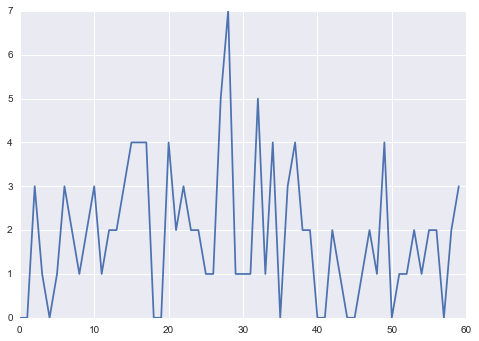

In [10]:
plt.plot(target_ajax['train'][0])

In [11]:
train_ajax['y'][0]

array([ 1.,  1.,  0.,  0.,  0.,  0.])

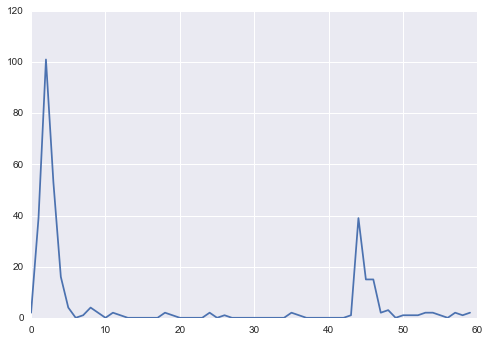

In [12]:
plt.plot(target_ajax['train'][1])

In [13]:
train_ajax['y'][1]

array([ 0.,  0.,  1.,  0.,  0.,  0.])

# model training

In [14]:
train_ajax['y'][0:100]

array([[ 1.,  1.,  0.,  0.,  0.,  0.],
       [ 0.,  0.,  1.,  0.,  0.,  0.],
       [ 1.,  0.,  0.,  0.,  0.,  0.],
       [ 0.,  1.,  1.,  1.,  0.,  0.],
       [ 0.,  0.,  0.,  0.,  0.,  0.],
       [ 0.,  0.,  0.,  0.,  0.,  0.],
       [ 1.,  1.,  0.,  0.,  0.,  0.],
       [ 0.,  0.,  0.,  0.,  0.,  0.],
       [ 0.,  0.,  0.,  0.,  0.,  0.],
       [ 1.,  0.,  0.,  0.,  1.,  0.],
       [ 0.,  0.,  0.,  0.,  0.,  0.],
       [ 0.,  0.,  0.,  0.,  0.,  0.],
       [ 0.,  0.,  0.,  0.,  0.,  0.],
       [ 1.,  0.,  0.,  0.,  0.,  0.],
       [ 0.,  0.,  0.,  0.,  0.,  0.],
       [ 1.,  1.,  0.,  0.,  0.,  0.],
       [ 0.,  0.,  0.,  1.,  0.,  0.],
       [ 0.,  0.,  0.,  0.,  0.,  0.],
       [ 1.,  0.,  0.,  0.,  0.,  1.],
       [ 0.,  0.,  0.,  0.,  0.,  0.],
       [ 1.,  1.,  0.,  0.,  1.,  0.],
       [ 0.,  0.,  0.,  0.,  0.,  0.],
       [ 0.,  1.,  0.,  0.,  0.,  0.],
       [ 0.,  0.,  0.,  0.,  0.,  0.],
       [ 1.,  1.,  0.,  0.,  0.,  0.],
       [ 0.,  0.,  0.,  0

In [15]:
y = chainer.Variable(train_ajax['y'][0:100].astype(numpy.int32))

In [16]:
y_ = chainer.functions.array.split_axis.split_axis(y, 6, 1)

In [17]:
numpy.array([5 for i in xrange(6)]).astype(numpy.float32) / 3

array([ 1.66666663,  1.66666663,  1.66666663,  1.66666663,  1.66666663,
        1.66666663], dtype=float32)

In [18]:
y_

(<variable at 0x1192a5a10>,
 <variable at 0x1192b1f90>)

In [19]:
import cnn

In [20]:
epoch_num = 50
output_dim = 2
save_data_dir = '../../data/bookmark/ajax/page_shuffle/'
save_model_dir = "../../multi_models/cnn/results/output_dim=%s/ajax_%s/" % (output_dim, epoch_num)
other.mkdir_p(save_model_dir)
train = numpy.load(save_data_dir + 'output_dim=%s/train.npz' % output_dim)
test = numpy.load(save_data_dir + 'output_dim=%s/test.npz' % output_dim)
cnntrain = cnn.CNN(save_model_dir=save_model_dir, epoch_num=epoch_num)

In [21]:
test["y"].astype(numpy.int32)

array([[0, 0],
       [0, 0],
       [0, 0],
       ..., 
       [1, 1],
       [0, 0],
       [0, 0]], dtype=int32)

In [22]:
import chainer.functions

In [23]:
t_ = chainer.functions.array.split_axis.split_axis(chainer.Variable(test["y"].astype(numpy.int32)), 2, 1)

In [24]:
chainer.Variable(t_[0].data.squeeze()).data

array([0, 0, 0, ..., 1, 0, 0], dtype=int32)

In [31]:
cnntrain.train(train, test, output_dim)

epoch 1
[[[[  4.   2.   6. ...,   5.   1.   1.]]]


 [[[ 17.   9.   9. ...,   6.  10.   6.]]]


 [[[ 14.   9.   8. ...,   8.   6.  12.]]]


 ..., 
 [[[  0.   1.   1. ...,   7.   2.   3.]]]


 [[[  5.   1.   4. ...,   1.   1.   3.]]]


 [[[ 10.   7.  15. ...,   7.   8.  17.]]]]
[[1 0]
 [0 0]
 [0 0]
 [1 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [1 0]
 [0 0]
 [0 0]
 [0 0]
 [0 1]
 [0 0]
 [0 0]
 [0 0]
 [0 1]
 [1 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 1]
 [0 0]
 [0 0]
 [0 0]
 [1 0]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [1 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [1 0]
 [0 0]
 [0 0]
 [0 1]
 [0 0]
 [0 1]]
0.85810315609
graph generated
[[[[  2.   0.   0. ...,   6.   6.  19.]]]


 [[[  1.   1.   1. ...,   3.   7.   3.]]]


 [[[  0.   0.   1. ...,   1.   2.   1.]]]


 ..., 
 [[[  3.  12.  12. ...,   5.   2.   6.]]]


 [[[  4.   1.   1. ...,   8.   6.   1.]]]


 [[[  5.   6.   0. ...,   6.   2.   2.]]]]
[[0 0]
 [0 1]
 [0 0]
 [1 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [1 0]
 [0 0]
 

ValueError: ON and OFF flags cannot be mixed.

In [56]:
epoch_num = 50
save_data_dir = '../data/bookmark/ajax_30/'
save_model_dir = "../models/cnn/results/ajax_%s_30/" % epoch_num
os.mkdir("../models/cnn/results/ajax_%s_30" % epoch_num)
train_0_0_30 = numpy.load(save_data_dir + '0_test/0_fold/0_train.npz')
test_0_0_30 = numpy.load(save_data_dir + '0_test/0_fold/0_test.npz')
cnntrain = cnn.CNN(save_model_dir=save_model_dir, epoch_num=epoch_num)

In [57]:
train_0_0_30['x'].shape

(2168, 30)

In [58]:
cnntrain.train(train_0_0_30, test_0_0_30)

epoch 1
graph generated
train mean loss=0.856766545025, accuracy=0.749077491297, throughput=915.436561686 images/sec
test  mean loss=0.770515868255, accuracy=0.769372691967
epoch 2
train mean loss=0.513243945982, accuracy=0.783671582042, throughput=951.976112163 images/sec
test  mean loss=0.517006267701, accuracy=0.7822878176
epoch 3
train mean loss=0.412609556917, accuracy=0.818265679633, throughput=1027.25791076 images/sec
test  mean loss=0.451953402415, accuracy=0.789667895359
epoch 4
train mean loss=0.374739015839, accuracy=0.839022137032, throughput=1065.5489713 images/sec
test  mean loss=0.436411118925, accuracy=0.813653138291
epoch 5
train mean loss=0.350621334466, accuracy=0.845479698474, throughput=1073.68401146 images/sec
test  mean loss=0.52345504488, accuracy=0.789667890521
epoch 6
train mean loss=0.344226040468, accuracy=0.855166042038, throughput=1046.9965709 images/sec
test  mean loss=0.429894789449, accuracy=0.800738004301
epoch 7
train mean loss=0.33875343829, accuracy

In [59]:
epoch_num = 50
save_data_dir = '../data/bookmark/ajax_60/'
save_model_dir = "../models/cnn/results/ajax_%s_60/" % epoch_num
os.mkdir("../models/cnn/results/ajax_%s_60" % epoch_num)
train_0_0_60 = numpy.load(save_data_dir + '0_test/0_fold/0_train.npz')
test_0_0_60 = numpy.load(save_data_dir + '0_test/0_fold/0_test.npz')
cnntrain = cnn.CNN(save_model_dir=save_model_dir, epoch_num=epoch_num)

In [60]:
train_0_0_60['x'].shape

(1456, 30)

In [61]:
cnntrain.train(train_0_0_60, test_0_0_60)

epoch 1
graph generated
train mean loss=0.756237555234, accuracy=0.770604389505, throughput=414.482740029 images/sec
test  mean loss=0.714041425916, accuracy=0.834710748728
epoch 2
train mean loss=0.495513381518, accuracy=0.840659337139, throughput=712.392200358 images/sec
test  mean loss=0.427742324174, accuracy=0.867768587324
epoch 3
train mean loss=0.323671543909, accuracy=0.870879124563, throughput=818.748929825 images/sec
test  mean loss=0.292671098484, accuracy=0.895316805721
epoch 4
train mean loss=0.295001422024, accuracy=0.886675816889, throughput=917.035975479 images/sec
test  mean loss=0.380116275981, accuracy=0.887052334373
epoch 5
train mean loss=0.34921425846, accuracy=0.860576918901, throughput=952.15286567 images/sec
test  mean loss=0.473161475687, accuracy=0.878787879445
epoch 6
train mean loss=0.262986373893, accuracy=0.901098895122, throughput=911.876287539 images/sec
test  mean loss=0.245746021572, accuracy=0.925619831755
epoch 7
train mean loss=0.208810764692, accu